In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import linear_model
import seaborn as sns 
%matplotlib inline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier 
import xgboost as xg
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, RocCurveDisplay, ConfusionMatrixDisplay 
from sklearn.base import clone
import warnings
#Ignore warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'C:\Users\MSI\Desktop\PTDL\updated_dataframe.csv')
print(df.head())

   Gender  Age  AffluenceGrade  LoyaltyCardTenure  TotalSpend  \
0       0   73               4                  7       26026   
1       0   63               7                  9        4035   
2       0   73               6                 31        5000   
3       0   66               4                  9        1000   
4       0   62               9                  5        1000   

   OrganicsPurchaseIndicator  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  


In [5]:
print(df.dtypes)

Gender                       int64
Age                          int64
AffluenceGrade               int64
LoyaltyCardTenure            int64
TotalSpend                   int64
OrganicsPurchaseIndicator    int64
dtype: object


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,8766.0,0.342688,0.474635,0.0,0.0,0.0,1.0,1.0
Age,8766.0,56.912389,13.121142,18.0,48.0,58.0,67.0,79.0
AffluenceGrade,8766.0,8.554985,3.347816,2.0,6.0,8.0,10.0,34.0
LoyaltyCardTenure,8766.0,7.380105,5.217871,2.0,4.0,6.0,9.0,38.0
TotalSpend,8766.0,6398.107347,7636.577461,1.0,1500.0,4884.0,7500.0,110072.0
OrganicsPurchaseIndicator,8766.0,0.179786,0.384031,0.0,0.0,0.0,0.0,1.0


In [9]:
df.corr()

,Gender,Age,AffluenceGrade,LoyaltyCardTenure,TotalSpend,OrganicsPurchaseIndicator
Gender,1.000000,0.040508,-0.049842,0.013091,0.022567,-0.133369
Age,0.040508,1.000000,-0.153193,0.199323,0.217381,-0.353912
AffluenceGrade,-0.049842,-0.153193,1.000000,-0.030025,-0.041635,0.340261
LoyaltyCardTenure,0.013091,0.199323,-0.030025,1.000000,0.022404,-0.047374
TotalSpend,0.022567,0.217381,-0.041635,0.022404,1.000000,-0.099392
OrganicsPurchaseIndicator,-0.133369,-0.353912,0.340261,-0.047374,-0.099392,1.000000


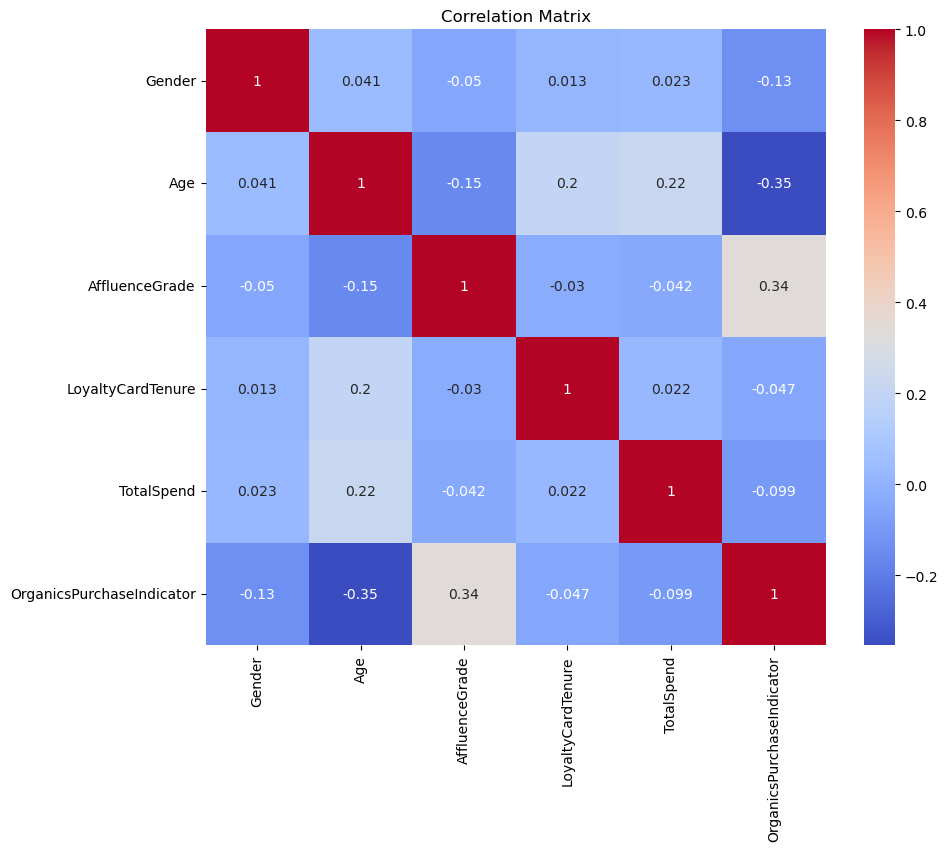

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
# Lọc các cột số
df_num = df.select_dtypes(include=['number'])
# Vẽ heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

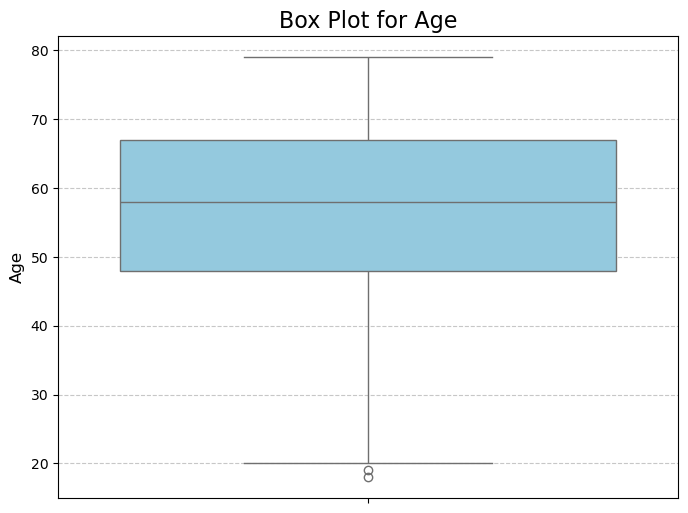

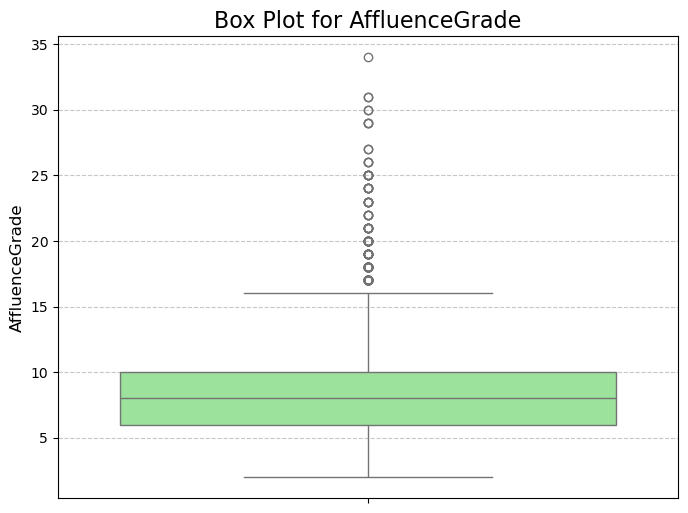

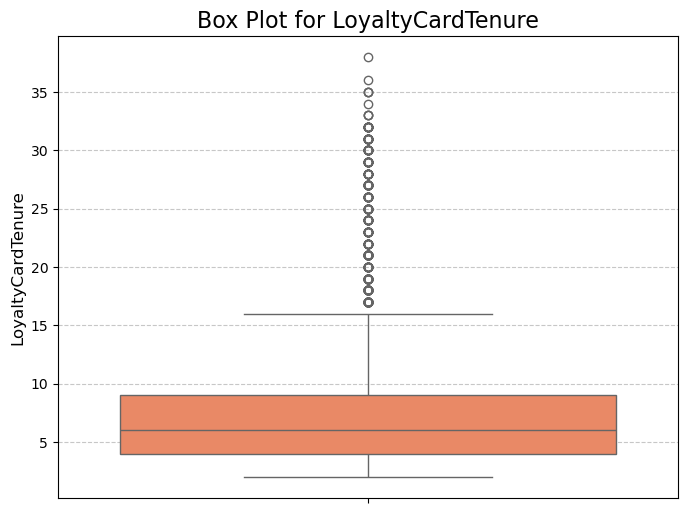

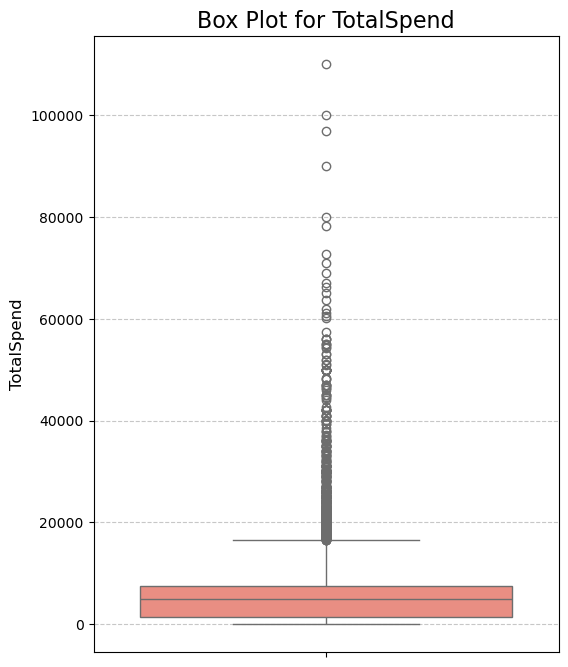

In [13]:
# Lấy thống kê mô tả từ df.describe()
stats = df.describe().T

plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Age'], color='skyblue')
plt.title('Box Plot for Age', fontsize=16)
plt.ylabel('Age', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(y=df['AffluenceGrade'], color='lightgreen')
plt.title('Box Plot for AffluenceGrade', fontsize=16)
plt.ylabel('AffluenceGrade', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(y=df['LoyaltyCardTenure'], color='coral')
plt.title('Box Plot for LoyaltyCardTenure', fontsize=16)
plt.ylabel('LoyaltyCardTenure', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Vẽ lại boxplot cho TotalSpend
plt.figure(figsize=(6, 8))
sns.boxplot(data=df, y='TotalSpend', color='salmon')
plt.title('Box Plot for TotalSpend', fontsize=16)
plt.ylabel('TotalSpend', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


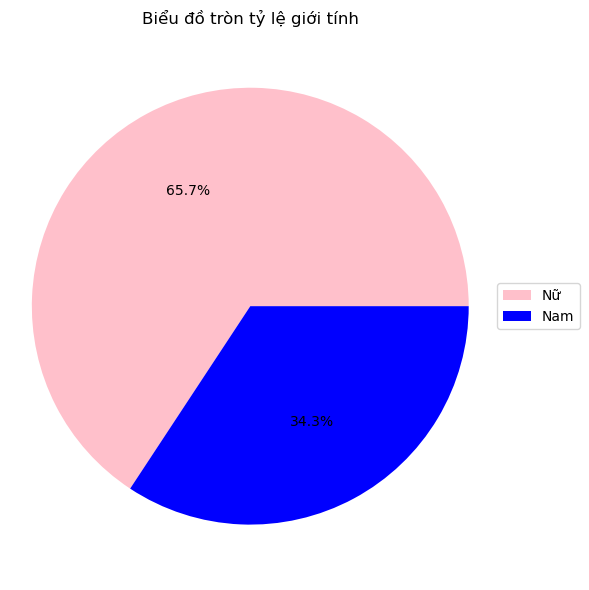

,Gender,count
0,0,5762
1,1,3004


In [15]:
# Tính toán tỷ lệ giới tính
gender_counts = df['Gender'].value_counts()

# Màu sắc
colors = ['pink', 'blue']

# Vẽ biểu đồ tròn
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=['', ''], autopct='%1.1f%%', colors=colors)
plt.title('Biểu đồ tròn tỷ lệ giới tính', loc='center')
plt.axis('equal')

plt.legend(labels=['Nữ', 'Nam'], loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()
Gender = df['Gender'].value_counts().reset_index()
Gender

Số lượng từng nhóm tuổi:
60-70: 2456
50-60: 2196
70-80: 1665
40-50: 1357
30-40: 891
20-30: 199
10-20: 2


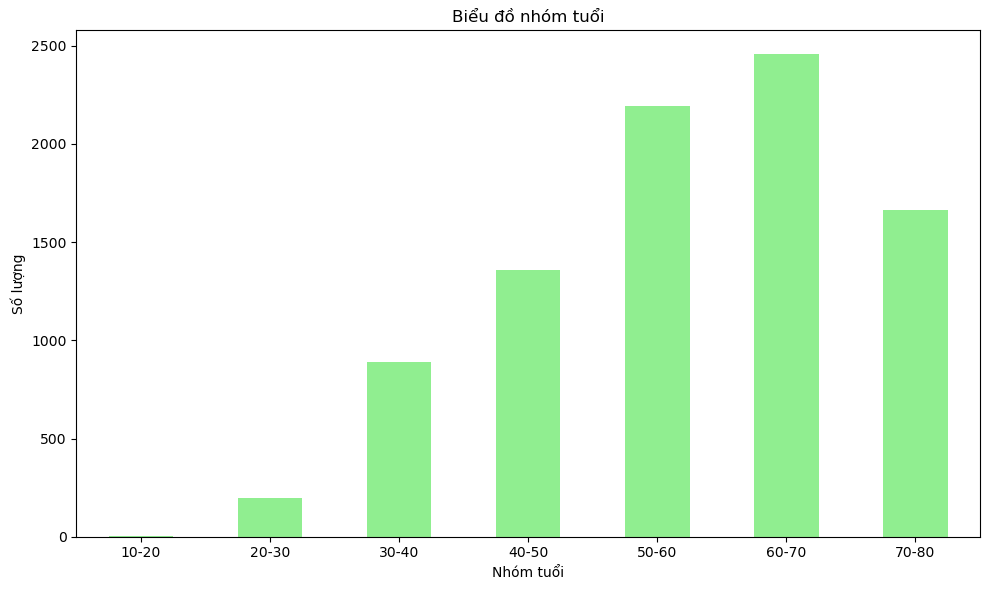

In [17]:
# Tạo các khoảng tuổi
bins = [18, 20, 30, 40, 50, 60, 70, 80]

# Chia các giá trị độ tuổi thành các khoảng đã chỉ định và đặt nhãn cho từng khoảng
age_groups = pd.cut(df['Age'], bins=bins, right=False, labels=['10-20', '20-30', '30-40', '40-50', '50-60','60-70','70-80'])

# Đếm số lượng từng nhóm tuổi
age_group_counts = age_groups.value_counts()

# Hiển thị kết quả
print("Số lượng từng nhóm tuổi:")
for age_group, count in age_group_counts.items():
    print(f"{age_group}: {count}")

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
barplot = age_group_counts.sort_index().plot(kind='bar', color='lightgreen')
plt.title('Biểu đồ nhóm tuổi')
plt.xlabel('Nhóm tuổi')
plt.ylabel('Số lượng')
plt.xticks(rotation=360)
plt.tight_layout()

plt.show()

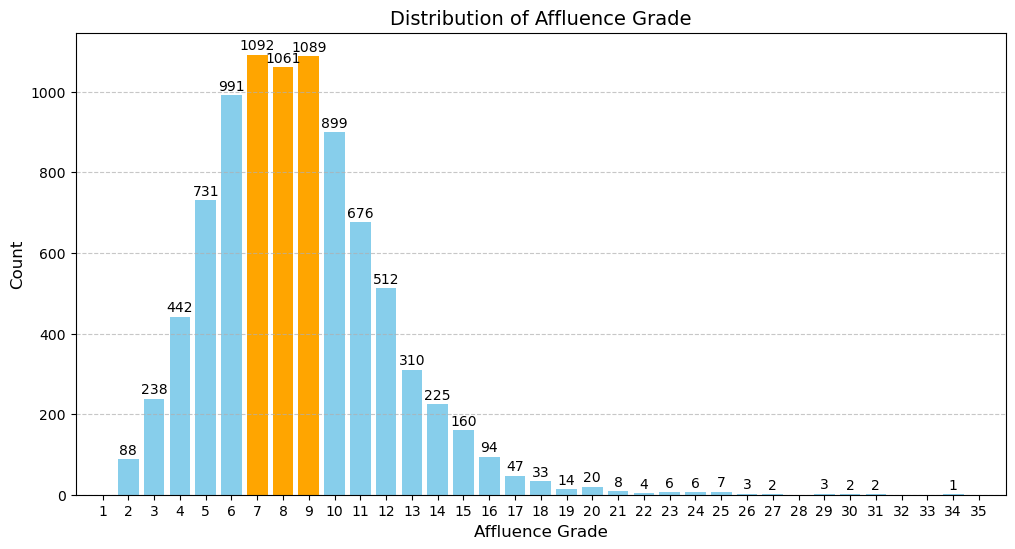

In [19]:
wealth_counts = df['AffluenceGrade'].value_counts().sort_index()
# Tìm 3 cột có số lượng nhiều nhất
top3_indices = wealth_counts.nlargest(3).index

# Vẽ biểu đồ cột với các cột top3 được làm nổi bật
plt.figure(figsize=(12, 6))
colors = ['skyblue' if index not in top3_indices else 'orange' for index in wealth_counts.index]

bars = plt.bar(wealth_counts.index, wealth_counts.values, color=colors)
plt.xlabel('Affluence Grade', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Affluence Grade', fontsize=14)
plt.xticks(ticks=range(1, 36), fontsize=10)  # Đặt nhãn cho trục X từ 1 đến 35
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Thêm số lượng trên đỉnh mỗi cột
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 5,  # Vị trí x, y
             f'{int(height)}',  # Giá trị số hiển thị
             ha='center', va='bottom', fontsize=10)

plt.show()


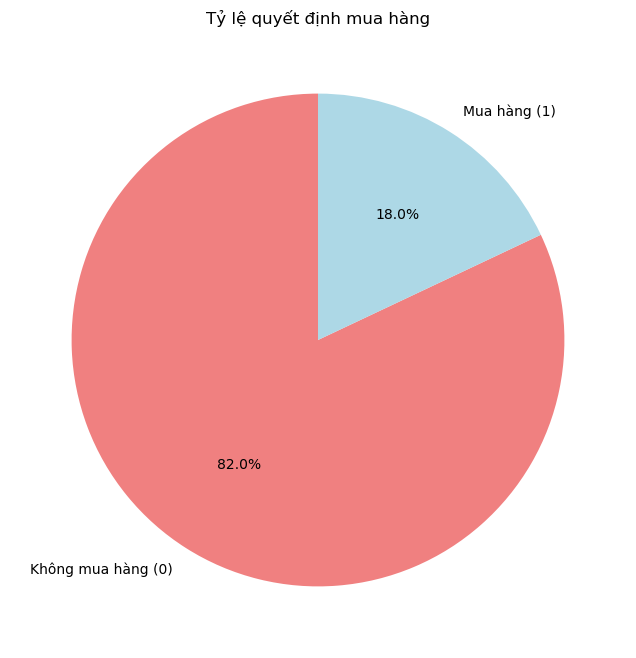

In [21]:
# Tính số lượng cho mỗi giá trị trong cột 'target'
target_counts = df['OrganicsPurchaseIndicator'].value_counts()

# Tạo biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(target_counts, labels=['Không mua hàng (0)', 'Mua hàng (1)'], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue'])
plt.title('Tỷ lệ quyết định mua hàng')
plt.show()

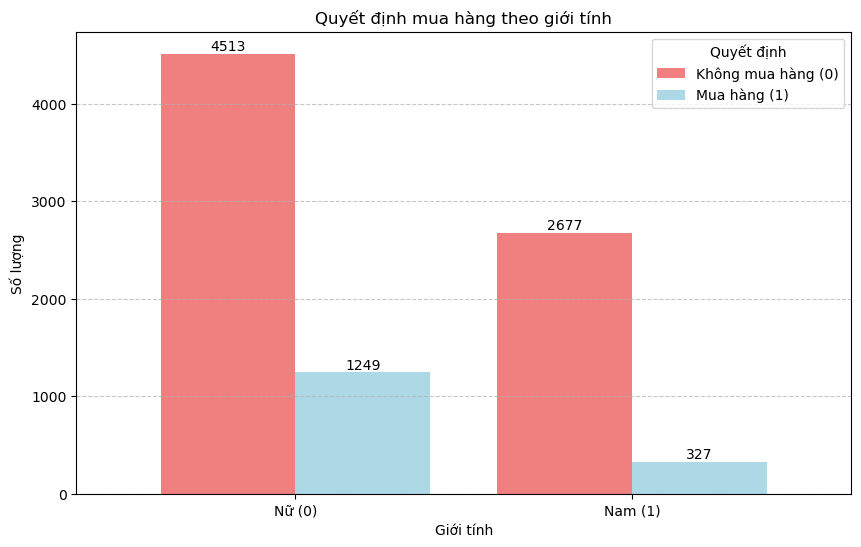

In [23]:
# Tạo bảng thống kê số lượng mua và không mua hàng theo giới tính
gender_target_counts = df.groupby(['Gender', 'OrganicsPurchaseIndicator']).size().unstack()

# Đặt nhãn cho các giới tính
gender_labels = ['Nữ (0)', 'Nam (1)']

# Vẽ biểu đồ hình cột
ax = gender_target_counts.plot(kind='bar', figsize=(10, 6), color=['lightcoral', 'lightblue'], width=0.8)

# Tùy chỉnh biểu đồ
plt.title('Quyết định mua hàng theo giới tính')
plt.xlabel('Giới tính')
plt.ylabel('Số lượng')
plt.xticks(ticks=[0, 1], labels=gender_labels, rotation=0)
plt.legend(['Không mua hàng (0)', 'Mua hàng (1)'], title="Quyết định")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Thêm giá trị trên mỗi cột
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()


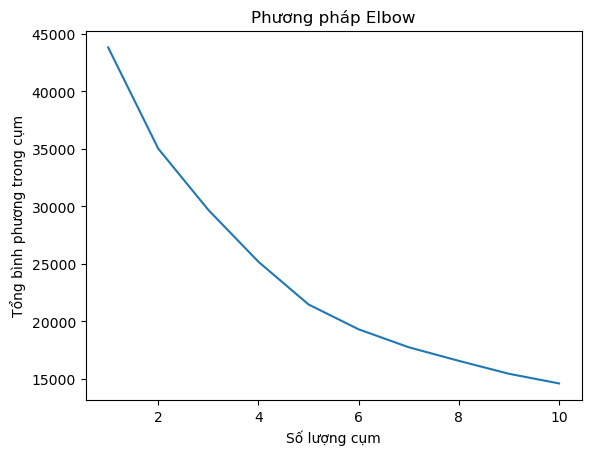

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df.drop('OrganicsPurchaseIndicator',axis=1))
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Phương pháp Elbow')
plt.xlabel('Số lượng cụm')
plt.ylabel('Tổng bình phương trong cụm')
plt.show()

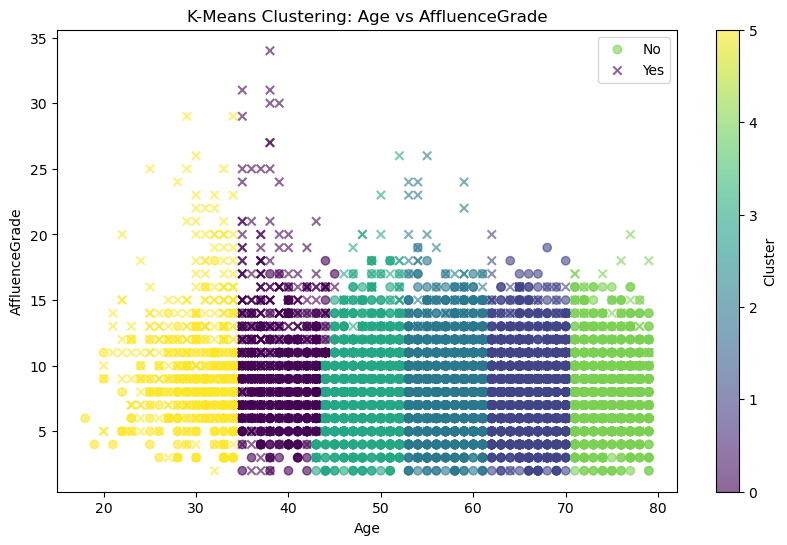

In [27]:
from sklearn.cluster import KMeans

# Tiến hành phân cụm KMeans với 6 cụm
kmeans = KMeans(n_clusters=6, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Age', 'AffluenceGrade']])

# Trực quan hóa mối quan hệ giữa Age và AffluenceGrade
plt.figure(figsize=(10, 6))

# Lọc các điểm có OrganicsPurchaseIndicator = 0 (dùng chấm tròn)
plt.scatter(df[df['OrganicsPurchaseIndicator'] == 0]['Age'], 
            df[df['OrganicsPurchaseIndicator'] == 0]['AffluenceGrade'], 
            c=df[df['OrganicsPurchaseIndicator'] == 0]['Cluster'], 
            cmap='viridis', alpha=0.6, label='No', marker='o')

# Lọc các điểm có OrganicsPurchaseIndicator = 1 (dùng dấu X)
plt.scatter(df[df['OrganicsPurchaseIndicator'] == 1]['Age'], 
            df[df['OrganicsPurchaseIndicator'] == 1]['AffluenceGrade'], 
            c=df[df['OrganicsPurchaseIndicator'] == 1]['Cluster'], 
            cmap='viridis', alpha=0.6, label='Yes', marker='x')

plt.title('K-Means Clustering: Age vs AffluenceGrade')
plt.xlabel('Age')
plt.ylabel('AffluenceGrade')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()


Tâm của các cụm (Centroids):
[[39.11686992  9.8902439 ]
 [65.80941499  8.17870201]
 [57.10911809  8.5062282 ]
 [48.56535533  8.29378173]
 [74.55593686  8.06588881]
 [30.01263538  9.87545126]]


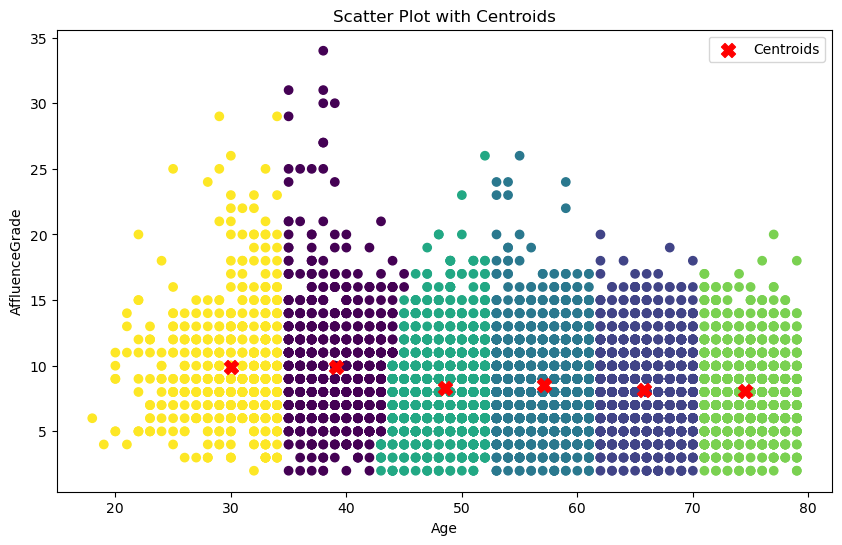

In [29]:
X = df[['Age', 'AffluenceGrade']]  # Giả sử bạn đang phân cụm theo Age và AffluenceGrade

# Lấy tâm của từng cụm
centroids = kmeans.cluster_centers_

# Hiển thị tâm của các cụm
print("Tâm của các cụm (Centroids):")
print(centroids)

# Vẽ biểu đồ phân tán và thêm tâm của các cụm
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['AffluenceGrade'], c=df['Cluster'], cmap='viridis', marker='o')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100, label='Centroids')
plt.xlabel('Age')
plt.ylabel('AffluenceGrade')
plt.title('Scatter Plot with Centroids')
plt.legend()
plt.show()


In [31]:
#tạo dữ liệu để train 
x = df[['Gender', 'Age', 'AffluenceGrade', 'LoyaltyCardTenure',  'TotalSpend']]
y = df['OrganicsPurchaseIndicator']
print(x.shape)
print(y.shape)

(8766, 5)
(8766,)


In [33]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train,  y_test = train_test_split(x,y, test_size=0.2,random_state=42) 
#Xây dựng cây
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
my_tree = DecisionTreeClassifier(max_depth=5)
my_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

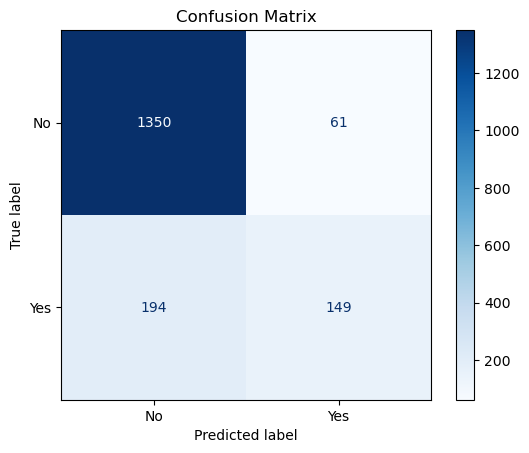

In [35]:
#Du doan tren du lieu test
y_pred = my_tree.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
# Hiển thị ma trận nhầm lẫn
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()
#print(cm)
#ConfusionMatrixDisplay.from_estimator(my_tree,x_test,y_test)

In [37]:
from sklearn.metrics import classification_report

# Báo cáo phân loại
report = classification_report(y_test, y_pred, target_names=['No', 'Yes'])
print("Báo cáo phân loại:\n", report)

Báo cáo phân loại:
               precision    recall  f1-score   support

          No       0.87      0.96      0.91      1411
         Yes       0.71      0.43      0.54       343

    accuracy                           0.85      1754
   macro avg       0.79      0.70      0.73      1754
weighted avg       0.84      0.85      0.84      1754



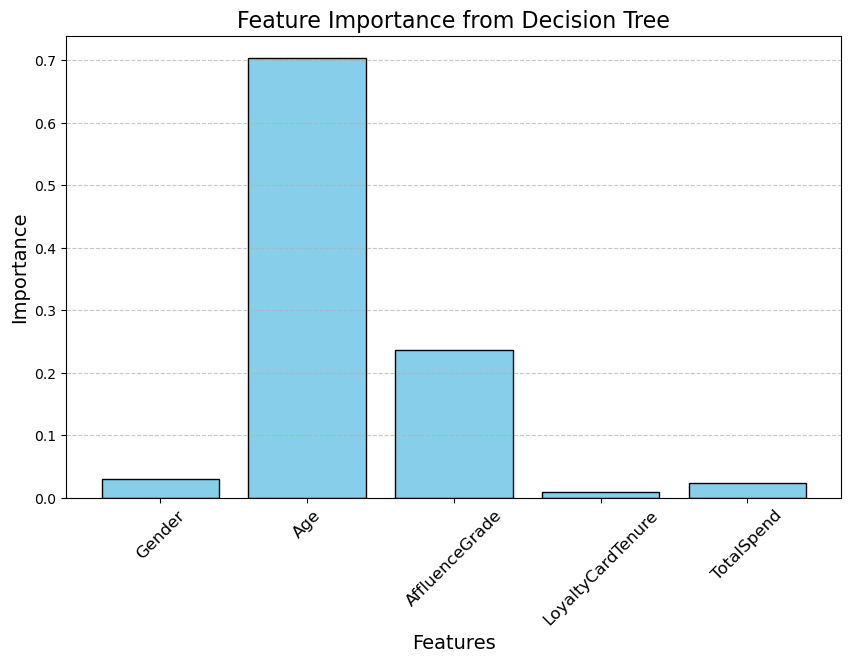

In [39]:

feature_importances = my_tree.feature_importances_
feature_names = ['Gender', 'Age', 'AffluenceGrade', 'LoyaltyCardTenure', 'TotalSpend']

plt.figure(figsize=(10, 6))
plt.bar(feature_names, feature_importances, color='skyblue', edgecolor='black')
plt.title("Feature Importance from Decision Tree", fontsize=16)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Importance", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


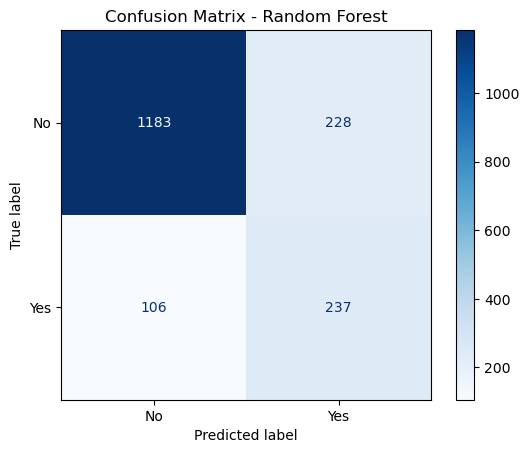

Báo cáo phân loại - Random Forest:
               precision    recall  f1-score   support

          No       0.92      0.84      0.88      1411
         Yes       0.51      0.69      0.59       343

    accuracy                           0.81      1754
   macro avg       0.71      0.76      0.73      1754
weighted avg       0.84      0.81      0.82      1754



In [41]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Xây dựng và huấn luyện mô hình Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42, class_weight='balanced')
rf_model.fit(x_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_rf = rf_model.predict(x_test)

# Đánh giá hiệu suất với Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['No', 'Yes'])
disp_rf.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Báo cáo phân loại
report_rf = classification_report(y_test, y_pred_rf, target_names=['No', 'Yes'])
print("Báo cáo phân loại - Random Forest:\n", report_rf)

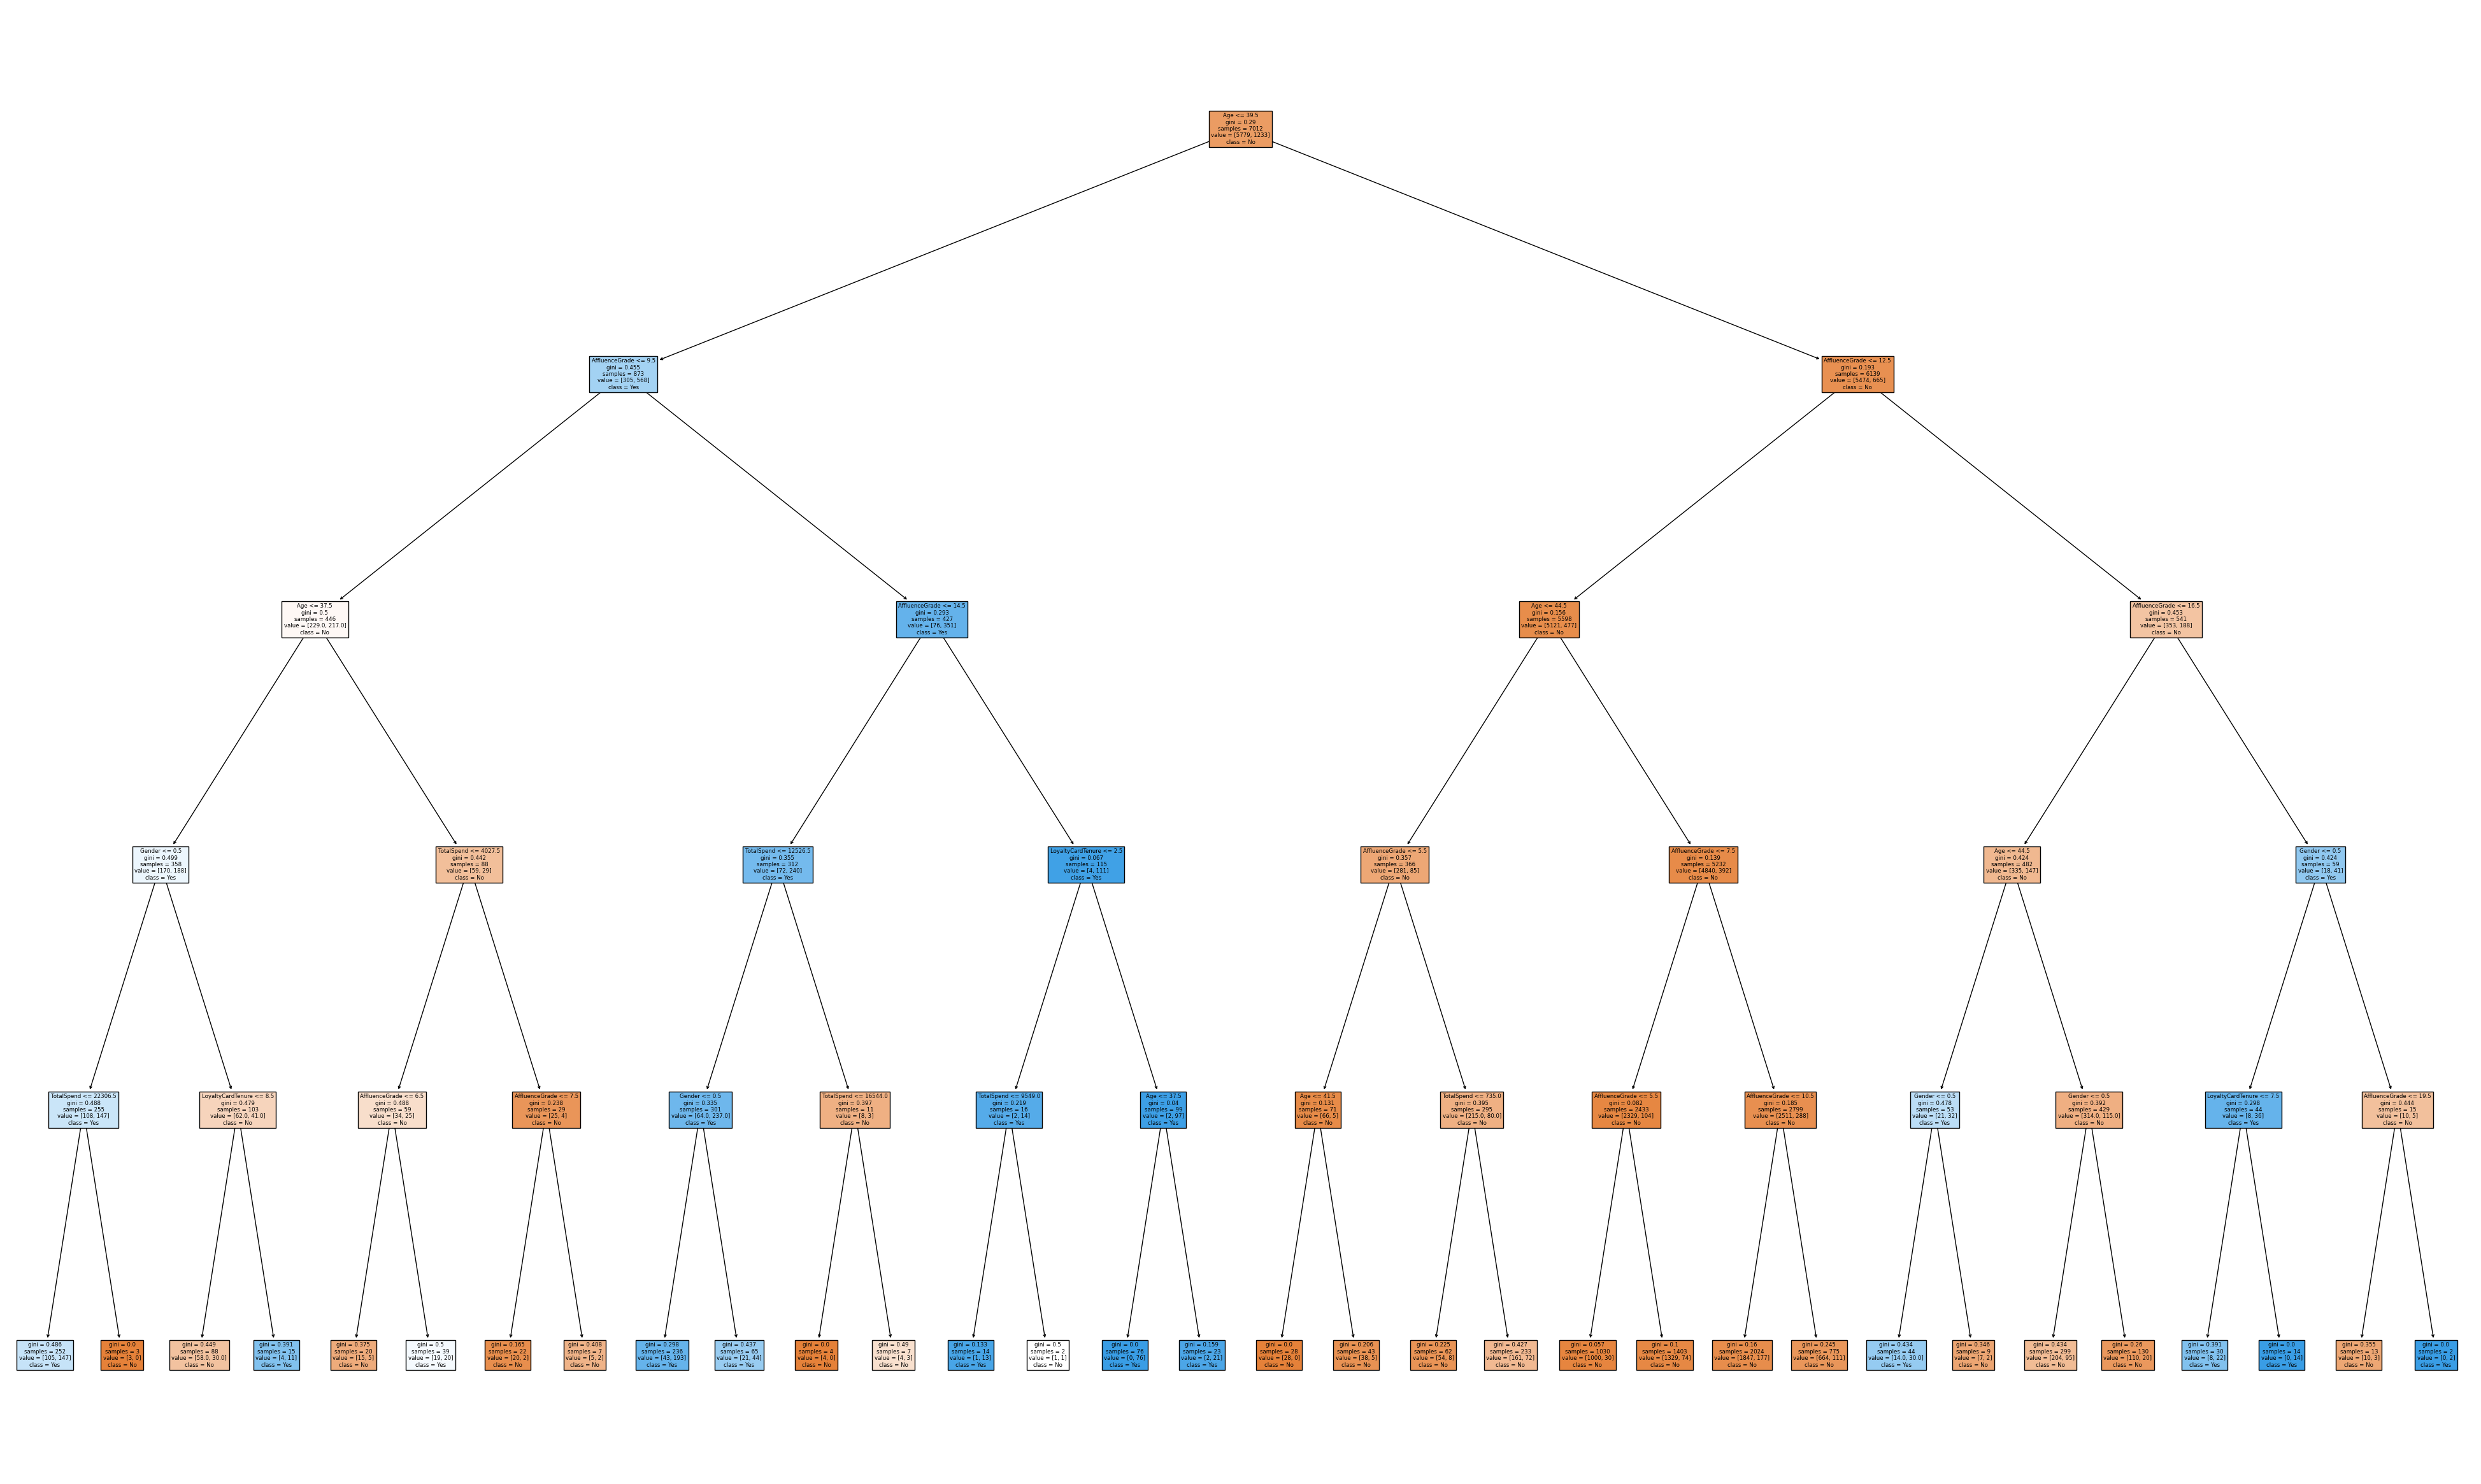

In [105]:
from sklearn.tree import plot_tree
plt.figure(figsize=(50, 30))
plot_tree(my_tree, feature_names=x.columns, class_names=['No', 'Yes'], filled=True)
plt.show()


In [107]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác của mô hình:", accuracy)


Độ chính xác của mô hình: 0.854618015963512


In [109]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(my_tree, x, y, cv=5)
print("Cross-Validation Scores:", scores)
print("Độ chính xác trung bình:", scores.mean())


Cross-Validation Scores: [0.87457241 0.86537365 0.86423274 0.8682259  0.85567598]
Độ chính xác trung bình: 0.8656161354927633


In [115]:
import pandas as pd

# Nhập dữ liệu từ người dùng
gender = int(input("Nhập giới tính (0: nữ, 1: nam): "))
age = int(input("Nhập độ tuổi: "))
affluence_grade = int(input("Nhập mức độ giàu có (AffluenceGrade): "))
loyalty_card_tenure = int(input("Nhập số năm sử dụng thẻ khách hàng trung thành (LoyaltyCardTenure): "))
total_spend = float(input("Nhập tổng chi tiêu (TotalSpend): "))

# Tạo DataFrame với tên cột tương ứng với dữ liệu huấn luyện
user_input = pd.DataFrame([[gender, age, affluence_grade, loyalty_card_tenure, total_spend]],
                          columns=['Gender', 'Age', 'AffluenceGrade', 'LoyaltyCardTenure', 'TotalSpend'])

# Dự đoán kết quả bằng mô hình cây quyết định đã huấn luyện
prediction = my_tree.predict(user_input)

# Hiển thị kết quả
if prediction == 1:
    print("Người này có khả năng mua hàng (Yes).")
else:
    print("Người này không có khả năng mua hàng (No).")


Nhập giới tính (0: nữ, 1: nam):  1
Nhập độ tuổi:  59
Nhập mức độ giàu có (AffluenceGrade):  10
Nhập số năm sử dụng thẻ khách hàng trung thành (LoyaltyCardTenure):  7
Nhập tổng chi tiêu (TotalSpend):  14790


Người này không có khả năng mua hàng (No).


In [174]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Mô hình của bạn
models = {
    "Logistic Regression": LogisticRegression(), 
    "Naive Bayes": GaussianNB(),
    "Random Forest Classifier": RandomForestClassifier(), 
    "Extreme Gradient Boost": XGBClassifier(),
    "KNN": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(), 
    "Random Forest": RandomForestClassifier(),
    "Support Vector Classifier": SVC(kernel='rbf', C=2)
}


# Danh sách lưu điểm chuẩn xác
model_scores = []

# Huấn luyện và đánh giá
for name, model in models.items():
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    model_scores.append((name, score))

# Sắp xếp theo điểm chuẩn xác giảm dần
model_scores.sort(key=lambda x: x[1], reverse=True)

# In ra kết quả
print("Điểm chuẩn xác của các mô hình:")
for name, score in model_scores:
    print(f"{name}: {score}")


Điểm chuẩn xác của các mô hình:
Logistic Regression: 0.8506271379703535
Extreme Gradient Boost: 0.8500570125427594
Naive Bayes: 0.8494868871151653
Random Forest: 0.8426453819840365
Random Forest Classifier: 0.8420752565564424
KNN: 0.8255416191562144
Support Vector Classifier: 0.8044469783352337
DecisionTreeClassifier: 0.7867730900798175


Accuracy: 0.85

 Báo cáo phân loại Extreme Gradient Boost:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1411
           1       0.70      0.41      0.52       343

    accuracy                           0.85      1754
   macro avg       0.78      0.68      0.71      1754
weighted avg       0.84      0.85      0.83      1754



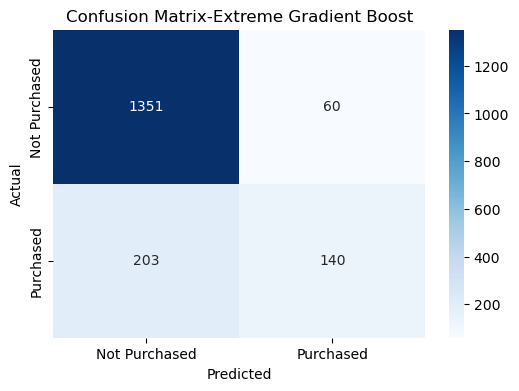

In [57]:
import xgboost as xgb
# Tạo và huấn luyện mô hình XGBoost
model = xgb.XGBClassifier(eval_metric='logloss')  # Bỏ use_label_encoder
model.fit(x_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(x_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Báo cáo chi tiết
print("\n Báo cáo phân loại Extreme Gradient Boost:")
print(classification_report(y_test, y_pred))

# Ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Purchased', 'Purchased'], yticklabels=['Not Purchased', 'Purchased'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix-Extreme Gradient Boost')
plt.show()

Accuracy: 0.85

 Báo cáo phân loại Logistic Regression:
              precision    recall  f1-score   support

           0       0.86      0.98      0.91      1411
           1       0.77      0.34      0.47       343

    accuracy                           0.85      1754
   macro avg       0.81      0.66      0.69      1754
weighted avg       0.84      0.85      0.83      1754



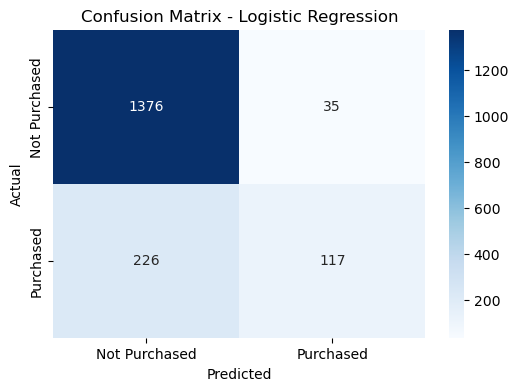

In [61]:
# Khởi tạo và huấn luyện Logistic Regression với số vòng lặp tăng lên
model = LogisticRegression(max_iter=500, solver='lbfgs')  # max_iter tăng lên 500
model.fit(x_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(x_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Báo cáo chi tiết
print("\n Báo cáo phân loại Logistic Regression:")
print(classification_report(y_test, y_pred))

# Ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Purchased', 'Purchased'], yticklabels=['Not Purchased', 'Purchased'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()